In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [4]:
# Week 9 – House Price Prediction (Machine Learning Intro)
"""
**Machine Learning:**  
A field of AI where models learn patterns from data to make predictions/decisions without being explicitly programmed.

 - **Supervised Learning:**  
  Data has input features (X) and a known target (y). Example: predict house price from area, bedrooms  Regression.
- **Unsupervised Learning:**  
  Data has no target. Model finds patterns/clusters by itself. Example: grouping customers by behavior.

**Key Tasks in this notebook:**
- Regression: predict continuous values (house prices).
- Implement simple linear regression from scratch.
- Use scikit-learn models (Linear Regression, Decision Tree, Random Forest).
- Train–test split, basic evaluation metrics (MAE, MSE, R²).
- Visualization of predictions vs actual. 
"""

'\n**Machine Learning:**  \nA field of AI where models learn patterns from data to make predictions/decisions without being explicitly programmed.\n\n - **Supervised Learning:**  \n  Data has input features (X) and a known target (y). Example: predict house price from area, bedrooms  Regression.\n- **Unsupervised Learning:**  \n  Data has no target. Model finds patterns/clusters by itself. Example: grouping customers by behavior.\n\n**Key Tasks in this notebook:**\n- Regression: predict continuous values (house prices).\n- Implement simple linear regression from scratch.\n- Use scikit-learn models (Linear Regression, Decision Tree, Random Forest).\n- Train–test split, basic evaluation metrics (MAE, MSE, R²).\n- Visualization of predictions vs actual. \n'

In [6]:
# Load the dataset
data = pd.read_csv("house_data.csv")  # Make sure file is in same folder
data.head()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [7]:
print("Shape:", data.shape)
print("\nInfo:")
print(data.info())

print("\nSummary statistics (numeric columns):")
display(data.describe())
data.isna().sum()

Shape: (300, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location       300 non-null    object
 6   Property_Type  300 non-null    object
 7   Price          300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB
None

Summary statistics (numeric columns):


,Area,Bedrooms,Bathrooms,Age,Price
count,300.00000,300.000000,300.000000,300.000000,3.000000e+02
mean,2759.70000,3.033333,2.026667,25.000000,2.488366e+07
std,1297.68143,1.467219,0.792495,14.332646,1.266525e+07
min,520.00000,1.000000,1.000000,0.000000,3.695000e+06
25%,1675.75000,2.000000,1.000000,12.000000,1.527750e+07
50%,2738.00000,3.000000,2.000000,25.500000,2.236500e+07
75%,3801.25000,4.000000,3.000000,36.250000,3.460812e+07
max,4999.00000,5.000000,3.000000,49.000000,5.870000e+07


Property_ID      0
Area             0
Bedrooms         0
Bathrooms        0
Age              0
Location         0
Property_Type    0
Price            0
dtype: int64

In [8]:
list(data.columns)

['Property_ID',
 'Area',
 'Bedrooms',
 'Bathrooms',
 'Age',
 'Location',
 'Property_Type',
 'Price']

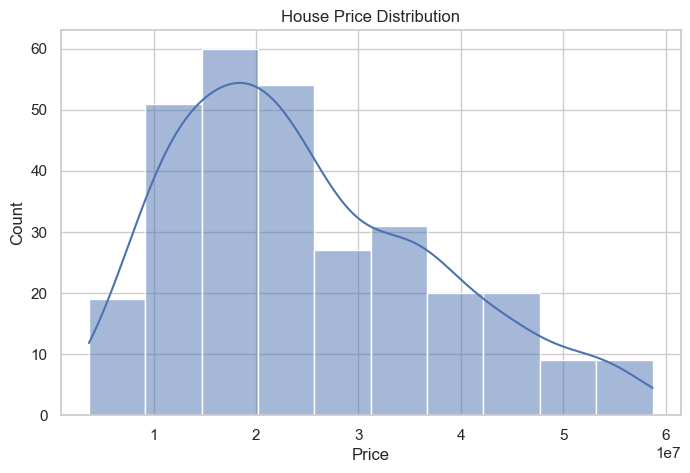

In [9]:
sns.histplot(data["Price"], kde=True)
plt.title("House Price Distribution")
plt.show()

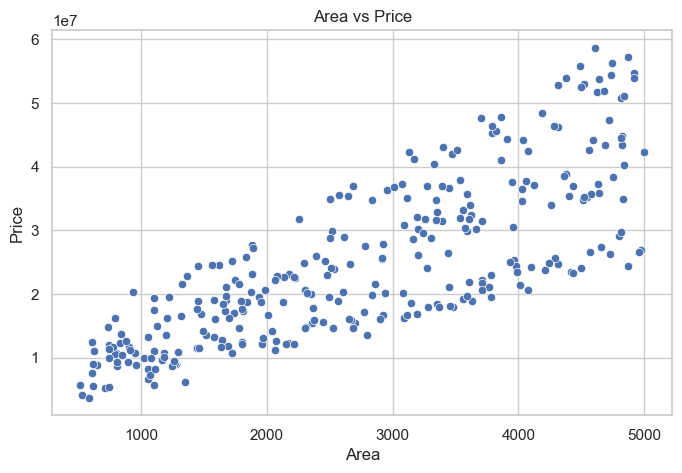

In [10]:
sns.scatterplot(x=data["Area"], y=data["Price"])
plt.title("Area vs Price")
plt.show()

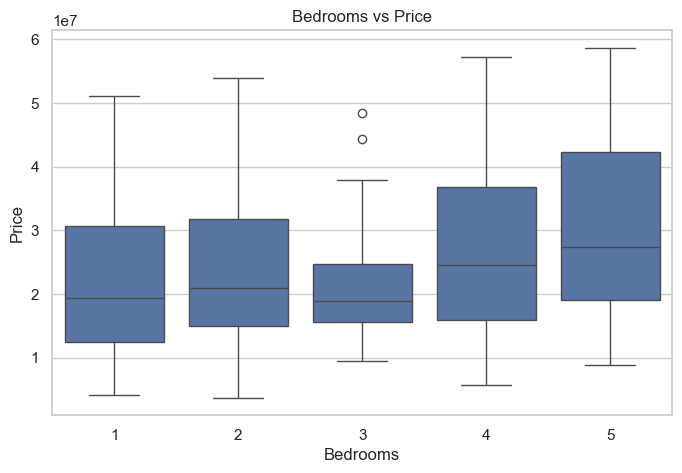

In [11]:
sns.boxplot(x=data["Bedrooms"], y=data["Price"])
plt.title("Bedrooms vs Price")
plt.show()

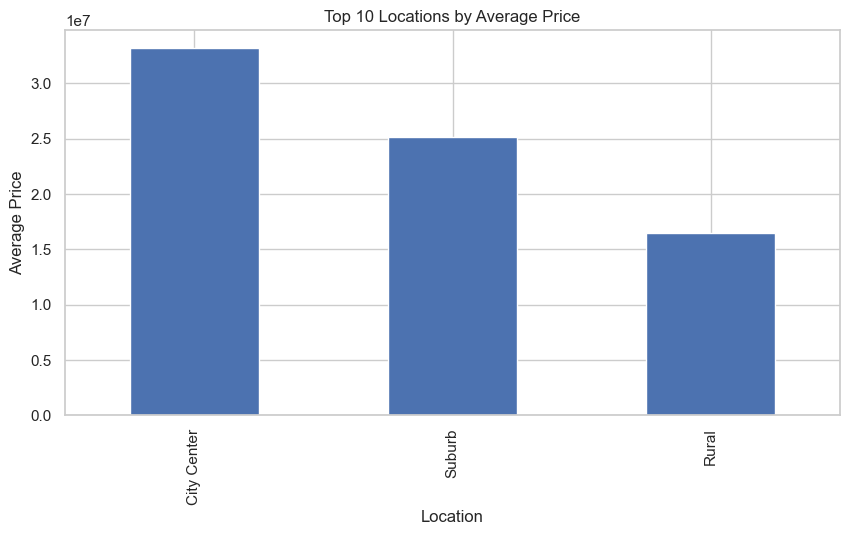

In [12]:
plt.figure(figsize=(10, 5))
data.groupby("Location")["Price"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.ylabel("Average Price")
plt.title("Top 10 Locations by Average Price")
plt.show()

In [13]:
target_col = "Price"  # your price column name
numeric_features = ["Area", "Bedrooms"]  # add/remove cols
categorical_features = ["Location"]  # or [] if none

In [15]:
model_cols = numeric_features + categorical_features + [target_col]
data_model = data[model_cols].dropna()
print("Original shape:", data.shape)
print("After dropping NAs:", data_model.shape)

Original shape: (300, 8)
After dropping NAs: (300, 4)


In [16]:
X = data_model[numeric_features + categorical_features]
y = data_model[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((240, 3), (60, 3))

In [17]:
feature_for_simple = "Area"  

X_simple = data_model[[feature_for_simple]].values  # shape (n, 1)
y_simple = data_model[target_col].values.reshape(-1, 1)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

X_train_s.shape, X_test_s.shape


((240, 1), (60, 1))

In [18]:
class SimpleLinearRegressionScratch:
    def __init__(self):
        self.w = None  # slope
        self.b = None  # intercept

    def fit(self, X, y):
        """
        X: shape (n_samples, 1)
        y: shape (n_samples, 1)
        """
        # Add column of ones for bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # [1, x]
        
        # Normal Equation: theta = (X^T X)^(-1) X^T y
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        self.b = float(theta_best[0])
        self.w = float(theta_best[1])

    def predict(self, X):
        return self.w * X + self.b

In [19]:
scratch_model = SimpleLinearRegressionScratch()
scratch_model.fit(X_train_s, y_train_s)

print("Slope (w):", scratch_model.w)
print("Intercept (b):", scratch_model.b)

Slope (w): 7889.314956366466
Intercept (b): 3162013.155608601


C:\Users\Dell\AppData\Local\Temp\ipykernel_20828\4234001377.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.b = float(theta_best[0])
C:\Users\Dell\AppData\Local\Temp\ipykernel_20828\4234001377.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w = float(theta_best[1])


In [20]:
y_pred_s = scratch_model.predict(X_test_s)
mae_s = np.mean(np.abs(y_test_s - y_pred_s))
mse_s = np.mean((y_test_s - y_pred_s) ** 2)
rmse_s = np.sqrt(mse_s)

print("Scratch Linear Regression (1 feature):")
print("MAE:", mae_s)
print("MSE:", mse_s)
print("RMSE:", rmse_s)

Scratch Linear Regression (1 feature):
MAE: 6008382.406257719
MSE: 57161898244305.086
RMSE: 7560548.8057617275


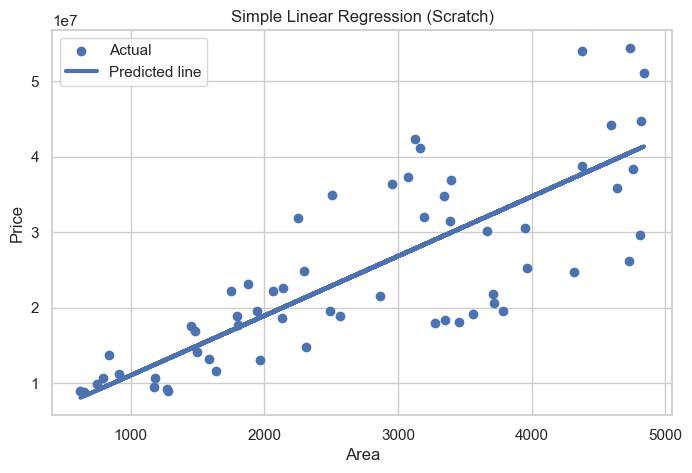

In [21]:
plt.scatter(X_test_s, y_test_s, label="Actual")
plt.plot(X_test_s, y_pred_s, label="Predicted line", linewidth=3)
plt.xlabel(feature_for_simple)
plt.ylabel("Price")
plt.title("Simple Linear Regression (Scratch)")
plt.legend()
plt.show()

In [22]:
numeric_transformer = "passthrough"
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

lin_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

lin_reg_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Area', 'Bedrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location'])])),
                ('model', LinearRegression())])

In [23]:
lin_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Area', 'Bedrooms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location'])])),
                ('model', LinearRegression())])

In [24]:
y_pred = lin_reg_model.predict(X_test)
y_pred[:5]

array([13813716.74852607, 18952804.68043795, 48961352.34770145,
       26686774.49255044, 22494301.68233399])

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression (scikit-learn) performance:")
print(f"MAE:  {mae:,.2f}")
print(f"MSE:  {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")

Linear Regression (scikit-learn) performance:
MAE:  2,591,722.59
MSE:  10,857,706,376,649.31
RMSE: 3,295,103.39
R²:   0.9238


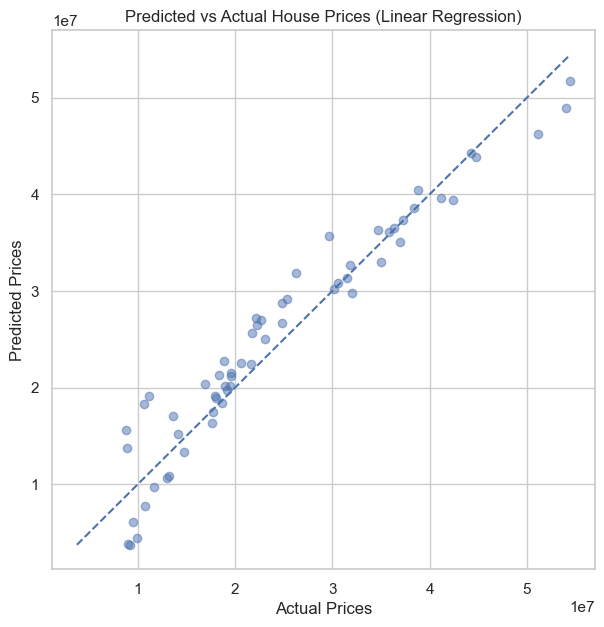

In [26]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices (Linear Regression)")
# Perfect prediction line
min_price = min(y_test.min(), y_pred.min())
max_price = max(y_test.max(), y_pred.max())
plt.plot([min_price, max_price], [min_price, max_price], linestyle="--")
plt.show()

In [27]:
poly_degree = 2  # start with 2

numeric_poly = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False))
])

preprocessor_poly = ColumnTransformer(
    transformers=[
        ("num", numeric_poly, numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

poly_lin_model = Pipeline(steps=[
    ("preprocessor", preprocessor_poly),
    ("model", LinearRegression())
])

poly_lin_model.fit(X_train, y_train)
y_pred_poly = poly_lin_model.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Linear Regression performance:")
print(f"MAE:  {mae_poly:,.2f}")
print(f"RMSE: {rmse_poly:,.2f}")
print(f"R²:   {r2_poly:.4f}")

Polynomial Linear Regression performance:
MAE:  2,655,972.56
RMSE: 3,468,701.59
R²:   0.9155


In [28]:
tree_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42, max_depth=5))  # you can tune
])

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree performance:")
print(f"MAE:  {mae_tree:,.2f}")
print(f"RMSE: {rmse_tree:,.2f}")
print(f"R²:   {r2_tree:.4f}")

Decision Tree performance:
MAE:  2,414,778.24
RMSE: 3,136,178.99
R²:   0.9309


In [29]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest performance:")
print(f"MAE:  {mae_rf:,.2f}")
print(f"RMSE: {rmse_rf:,.2f}")
print(f"R²:   {r2_rf:.4f}")

Random Forest performance:
MAE:  1,431,676.63
RMSE: 1,957,909.58
R²:   0.9731


In [30]:
results = pd.DataFrame({
    "Model": ["Linear", "Polynomial Linear", "Decision Tree", "Random Forest"],
    "MAE": [mae, mae_poly, mae_tree, mae_rf],
    "RMSE": [rmse, rmse_poly, rmse_tree, rmse_rf],
    "R2": [r2, r2_poly, r2_tree, r2_rf]
})

results

,Model,MAE,RMSE,R2
0,Linear,2.591723e+06,3.295103e+06,0.923762
1,Polynomial Linear,2.655973e+06,3.468702e+06,0.915517
2,Decision Tree,2.414778e+06,3.136179e+06,0.930938
3,Random Forest,1.431677e+06,1.957910e+06,0.973083


In [31]:
# Get feature names after preprocessing
ohe = rf_model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = numeric_features + cat_feature_names

rf = rf_model.named_steps["model"]
importances = rf.feature_importances_

feature_importances = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importances.head(10)

,feature,importance
0,Area,0.692537
2,Location_City Center,0.152760
3,Location_Rural,0.100449
4,Location_Suburb,0.030275
1,Bedrooms,0.023979


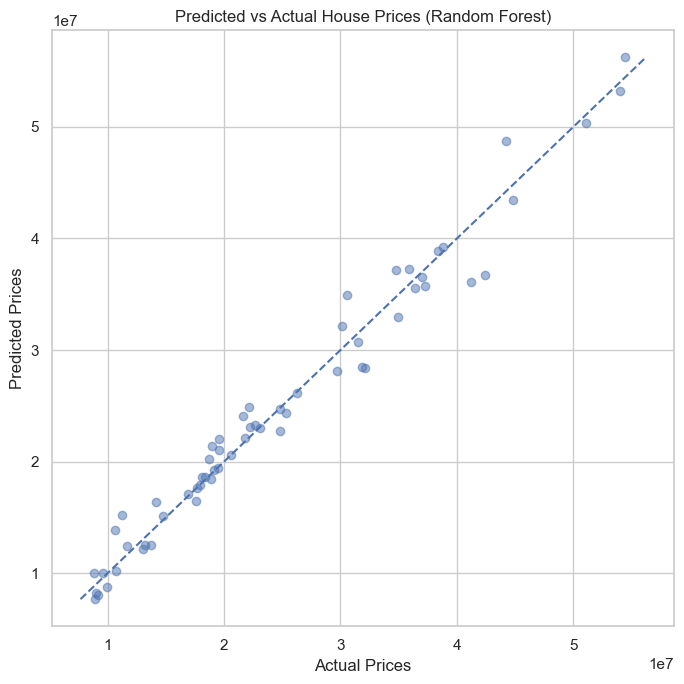

In [32]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices (Random Forest)")
min_price = min(y_test.min(), y_pred_rf.min())
max_price = max(y_test.max(), y_pred_rf.max())
plt.plot([min_price, max_price], [min_price, max_price], linestyle="--")
plt.tight_layout()
plt.savefig("predictions_vs_actual.png", dpi=300)
plt.show()